In [4]:
import pandas as pd # data processing, CSV file I/O (e.. pd.read_csv)
import datetime 
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/elloumiaymen/Desktop/DataScience Academy /Kaggle Projects/Avocado /avocado.csv')



data = data.drop(['Unnamed: 0'], axis = 1) #drop the useless column
names = ["date", "avprice", "totalvol", "small","large","xlarge","totalbags","smallbags","largebags","xlargebags","type","year","region"] #get new column names
data = data.rename(columns=dict(zip(data.columns, names))) #rename columns
print(data.head())
print(data.count())  #data.count to count all rows of all columns`


print(data.info()) #When I look at data types, I see that date is not datetime, so I will solve this problem and sort the data by date. Then I will divide the dates into day-month-year for a better analysis.

# Converting the date from "ojbect" to "datetime"

dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in data['date']]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
data['date'] = pd.DataFrame({'date':sorteddates})
data['Year'], data['Month'],  data['Day'] = data['date'].str.split('-').str
print(data.head())

print(max(data.Year)) # GET MAX YEAR :D 


#Now I got Sorted data let's do some visualizations



         date  avprice   totalvol    small      large  xlarge  totalbags  \
0  2015-12-27     1.33   64236.62  1036.74   54454.85   48.16    8696.87   
1  2015-12-20     1.35   54876.98   674.28   44638.81   58.33    9505.56   
2  2015-12-13     0.93  118220.22   794.70  109149.67  130.50    8145.35   
3  2015-12-06     1.08   78992.15  1132.00   71976.41   72.58    5811.16   
4  2015-11-29     1.28   51039.60   941.48   43838.39   75.78    6183.95   

   smallbags  largebags  xlargebags          type  year  region  
0    8603.62      93.25         0.0  conventional  2015  Albany  
1    9408.07      97.49         0.0  conventional  2015  Albany  
2    8042.21     103.14         0.0  conventional  2015  Albany  
3    5677.40     133.76         0.0  conventional  2015  Albany  
4    5986.26     197.69         0.0  conventional  2015  Albany  
date          18249
avprice       18249
totalvol      18249
small         18249
large         18249
xlarge        18249
totalbags     18249
smallba

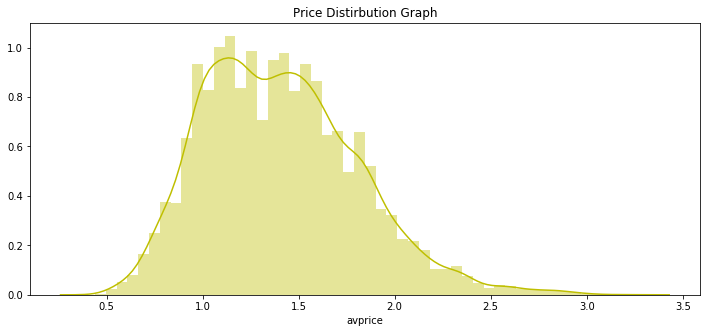

In [7]:
plt.figure(figsize=(12,5)) 
#figsize to your plt.figure() function of the pyplot module; You just have to specify a tuple with the width and hight of your figure in inches, just like this plt.figure(figsize=(3,4)), for it to work.
plt.title("Price Distirbution Graph")
ax = sns.distplot(data["avprice"], color = 'y')


In [11]:
avg = sum(data["avprice"])/len(data["avprice"])
avg
#Here we can see that the weight is in the price range of $ 1.15


1.4059784097758825

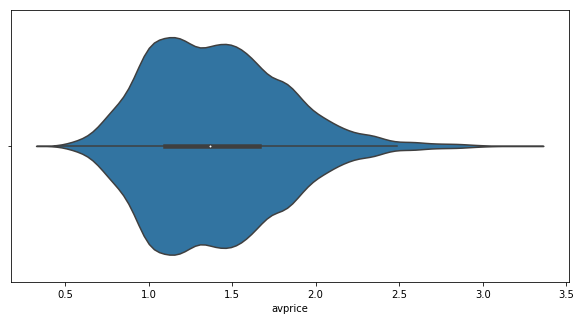

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(data.dropna(subset = ['avprice']).avprice)

Text(0.5,1,'Average Price of Avocado According to Region')

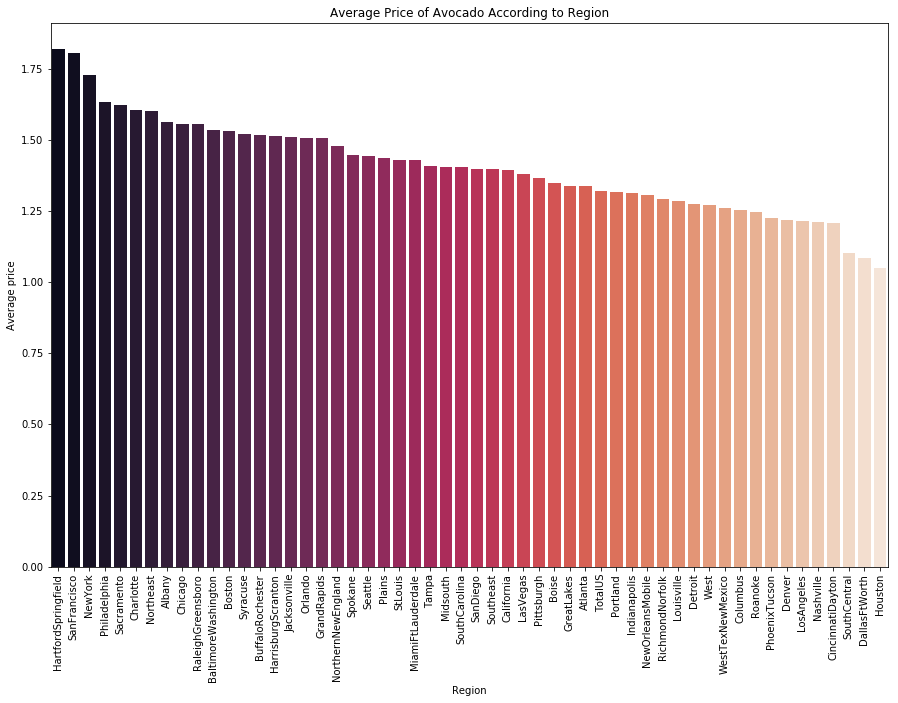

In [19]:
region_list=list(data.region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.avprice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price,palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average price')
plt.title('Average Price of Avocado According to Region')